In [1]:
import pandas

df = pandas.read_csv("cancerAllv3.csv")

print(df)

     radius  texture  perimeter    area        s        c  concavity       cp  \
0     17.99    10.38     122.80  1001.0  0.11840  0.27760    0.30010  0.14710   
1     20.57    17.77     132.90  1326.0  0.08474  0.07864    0.08690  0.07017   
2     19.69    21.25     130.00  1203.0  0.10960  0.15990    0.19740  0.12790   
3     11.42    20.38      77.58   386.1  0.14250  0.28390    0.24140  0.10520   
4     20.29    14.34     135.10  1297.0  0.10030  0.13280    0.19800  0.10430   
..      ...      ...        ...     ...      ...      ...        ...      ...   
564   21.56    22.39     142.00  1479.0  0.11100  0.11590    0.24390  0.13890   
565   20.13    28.25     131.20  1261.0  0.09780  0.10340    0.14400  0.09791   
566   16.60    28.08     108.30   858.1  0.08455  0.10230    0.09251  0.05302   
567   20.60    29.33     140.10  1265.0  0.11780  0.27700    0.35140  0.15200   
568    7.76    24.54      47.92   181.0  0.05263  0.04362    0.00000  0.00000   

        sym       fd  ...  

In [2]:

features=['radius','texture','perimeter','area','s','c','concavity','cp','sym']
          
import numpy as np
X = np.array(df)
y = X[:,30]
X = X[:,0:9]

print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 3.001e-01 1.471e-01 2.419e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 8.690e-02 7.017e-02 1.812e-01]
 [1.969e+01 2.125e+01 1.300e+02 ... 1.974e-01 1.279e-01 2.069e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 9.251e-02 5.302e-02 1.590e-01]
 [2.060e+01 2.933e+01 1.401e+02 ... 3.514e-01 1.520e-01 2.397e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 0.000e+00 1.587e-01]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)

(426, 9)


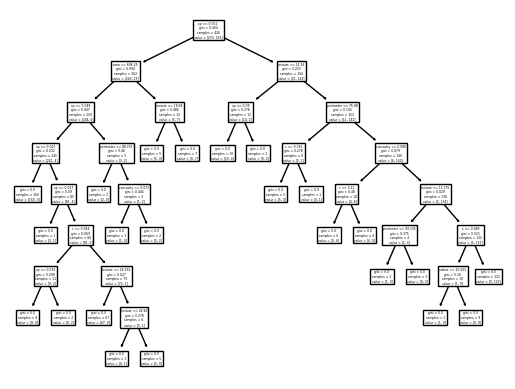

In [4]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf, feature_names=features)
print(X_train.shape)

In [5]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test)
print (accuracy_score(y_test, predicted))

0.9230769230769231


In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)


array([[81,  6],
       [ 5, 51]], dtype=int64)

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94        87
         1.0       0.89      0.91      0.90        56

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

